In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from collections import Counter
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, precision_recall_fscore_support
from sklearn.svm import LinearSVC

from models.MeTooDataset import MeTooDataset
from models import SentenceEmbeddings

In [2]:
labels = ['Against', 'Neutral', 'Favor']

In [3]:
experiment_name = '1D'

In [4]:
algorithm_name = 'embedding'

In [5]:
profile_ids = [783214, 19568591, 103018203, 256881576, 810619093749559296]

In [6]:
labels=list('ABDEF')

In [7]:
training_dataset = MeTooDataset(
    root='/home/nils/Documents/thesis/data',
    mode='word_embeddings',
    task='metoo_training'
)

In [8]:
testing_dataset = MeTooDataset(
    root='/home/nils/Documents/thesis/data',
    mode='word_embeddings',
    task='metoo_testing'
)

In [9]:
predictions = SentenceEmbeddings.train_and_predict(
    training_dataset,
    testing_dataset
)

[LibLinear]

In [10]:
df = pd.DataFrame.from_records(
        precision_recall_fscore_support(
            testing_dataset.y, 
            predictions
        )[:3], 
        index=['Precision', 'Recall', 'F1-Score'], 
        columns=[labels[idx] for idx in set(testing_dataset.y)]
    ).transpose()

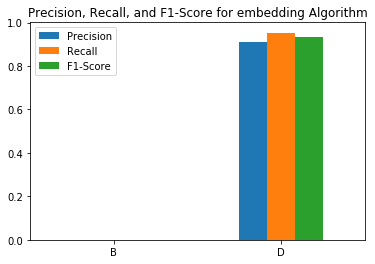

In [11]:
df.plot(kind='bar', title=f'Precision, Recall, and F1-Score for {algorithm_name} Algorithm', legend=True, rot=0)
plt.legend(loc='upper left')

with open(f'/home/nils/Documents/thesis/thesis-writing/thesis/img/{experiment_name}_{algorithm_name}.eps', 'wb') as f:
    plt.savefig(f, format='eps')

In [12]:
with open(f'/home/nils/Documents/thesis/thesis-writing/thesis/data/{experiment_name}_{algorithm_name}.tex', 'w', encoding='utf-8') as f:
    df.to_latex(f)

# Compute Stances based on Predictions

In [13]:
stances_df = pd.DataFrame.from_dict(
    {
        user_id: {
            'Stance': np.mean([
                stance
                for _user_id, stance in list(zip(testing_dataset.id, predictions))
                if _user_id == user_id
            ]
            )
        }
        for user_id in profile_ids
    },
    orient='index'
).applymap(lambda x: x-1)

In [14]:
with open(f'/home/nils/Documents/thesis/thesis-writing/thesis/data/{experiment_name}_{algorithm_name}_stances.tex', 'w', encoding='utf-8') as f:
    stances_df.to_latex(f)

# Compute Means of annotated Stances

In [15]:
means_df = pd.DataFrame.from_dict(
    {
        user_id: {
            'Mean': np.mean(
                [
                    stance
                    for _user_id, stance in list(zip(testing_dataset.id, testing_dataset.y))
                    if _user_id == user_id
                ]
            )
        }
        for user_id in profile_ids
    },
    orient='index'
).applymap(lambda x: x - 1)

# Compute Mean Squared Error w.r.t. Means of Stances

In [16]:
mse_df = pd.DataFrame.from_dict(
    {
        user_id: {
            'Mean Squared Error': mean_squared_error(
                stances_df.loc[user_id].values,
                means_df.loc[user_id].values
            )
        }
        for user_id in profile_ids
    },
    orient='index'
)

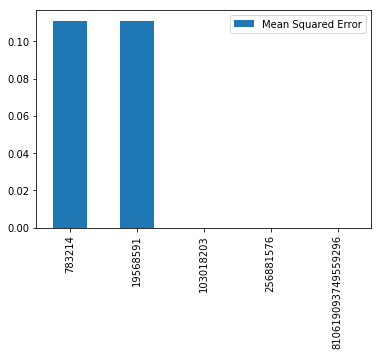

In [17]:
mse_df.plot(kind='bar')

In [18]:
with open(f'/home/nils/Documents/thesis/thesis-writing/thesis/data/{experiment_name}_{algorithm_name}_mse.tex', 'w', encoding='utf-8') as f:
    mse_df.to_latex(f)

In [20]:
with open(f'/home/nils/Documents/thesis/data/{experiment_name}_{algorithm_name}_mse.csv', 'w', encoding='utf-8') as f:
    mse_df.to_csv(f)